# Atividade: Neurônio Artificial

**INSTITUTO FEDERAL DE MINAS GERAIS**
*Departamento de Engenharia e Computação*

**Professor:** Ciniro Nametala  
**Aluno:** Emanuel Rocha

In [120]:
#Importando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [121]:
#Função do neuronio
def neuronio(x1,x2,w0,w1,w2,bias):
    u=(w1*x1)+(w2*x2)-(w0*bias)
    return 1 if u>0 else 0

In [122]:
#Transportando dados do arquivo para os vetores
dados=pd.read_csv('amostrabivariada.csv',sep=';',decimal=',')
dados['x']=pd.to_numeric(dados['x'],errors='coerce')
dados['y']=pd.to_numeric(dados['y'],errors='coerce')
dados.head()

,x,y
0,1.183988,1.832880
1,1.523565,2.293337
2,2.199241,2.342880
3,2.768052,2.179136
4,2.165374,1.888445


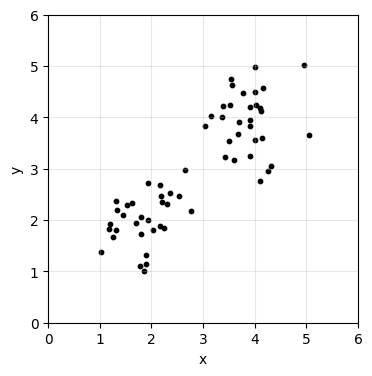

In [123]:
#Plotando os dados
plt.figure(figsize=(4,4))
plt.scatter(dados['x'],dados['y'],c='black',s=10)
plt.xlim(0,6)
plt.ylim(0,6)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True,alpha=0.3)
plt.show()

In [124]:
#valores para pesos
w0=-6
w1=-1
w2=-1
bias=1

#aplicando a função neuronio aos dados
classificacoes=[]
for i, linha in dados.iterrows():
    classe=neuronio(linha['x'],linha['y'],w0,w1,w2,bias)
    classificacoes.append(classe)

dados['classe'] = classificacoes
dados.head()

,x,y,classe
0,1.183988,1.832880,1
1,1.523565,2.293337,1
2,2.199241,2.342880,1
3,2.768052,2.179136,1
4,2.165374,1.888445,1


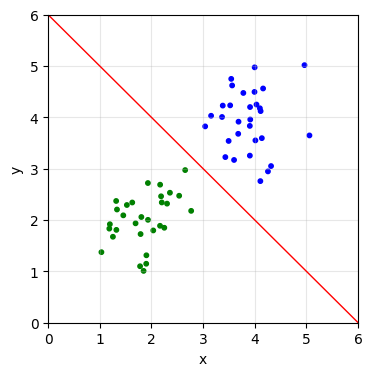

In [125]:
plt.figure(figsize=(4,4))
cores=['blue' if c==0 else 'green' for c in dados['classe']]
plt.scatter(dados['x'],dados['y'],c=cores,s=10)

#gerando a reta de separacao
eixox=np.linspace(0,6,100)
eixoy=(w0*-1)-eixox
plt.plot(eixox,eixoy,'r-',linewidth=1)

plt.xlim(0,6)
plt.ylim(0,6)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True,alpha=0.3)
plt.show()

## Atividade 2

In [126]:
def plota_grafico(x,y,titulo):
    plt.figure(figsize=(4,4))
    plt.plot(x,y,'b-',linewidth=2)
    plt.title(titulo)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True, alpha=0.3)
    plt.show()

def logistica(x, beta):
    return 1 / (1 + np.exp(-beta * x))

def degrau(x):
    return np.where(x < 0, 0, 1)

def bipolar(x):
    return np.where(x < 0, -1, np.where(x == 0, 0, 1))

def rampa(x,beta):
    return np.where(x>beta,beta, np.where((-beta<=x)&(x<=beta),x,-beta))

def relu(x):
    return np.where(x < 0, 0, x)

def hiperbolica(x, beta):
    return (1 - np.exp(-beta * x)) / (1 + np.exp(-beta * x))

def gaussiana(x, cf, dp):
    return np.exp(-(((x-cf)**2)/2*dp*dp))

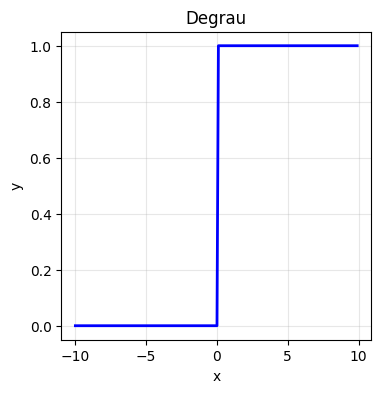

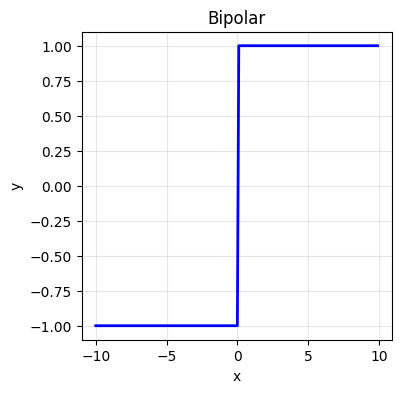

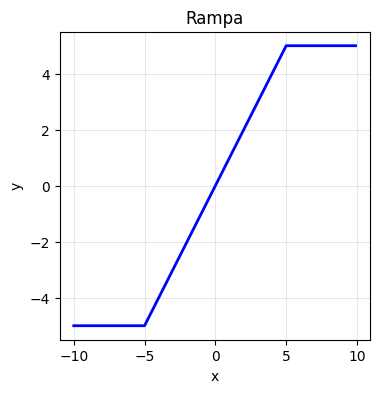

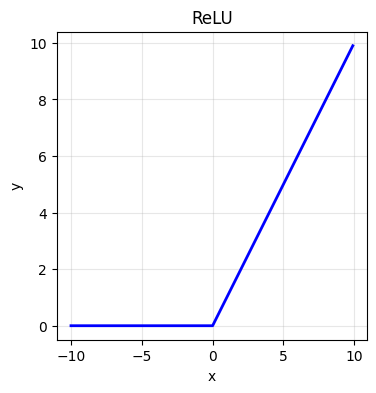

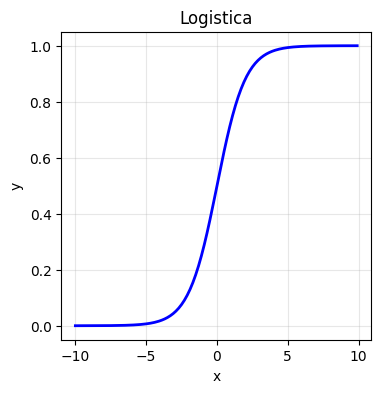

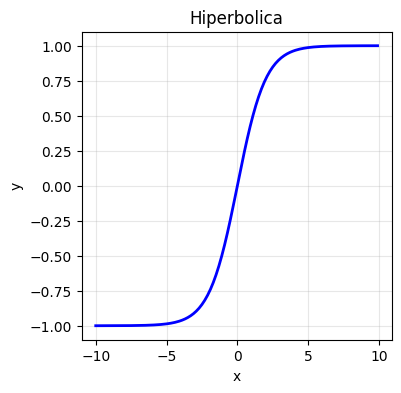

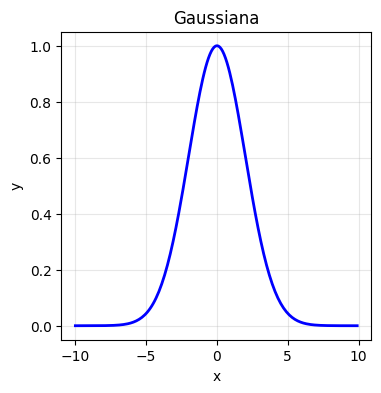

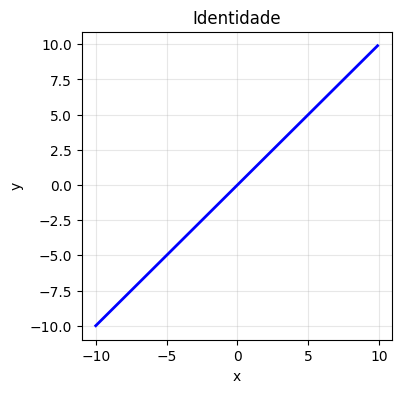

In [127]:
# gerar valores de x
x_val = np.arange(-10,10,0.1)

# Funcao Degrau
plota_grafico(x_val, degrau(x_val), 'Degrau')

# Funcao Bipolar
plota_grafico(x_val, bipolar(x_val), 'Bipolar')

# Funcao Rampa
beta = 5
plota_grafico(x_val, rampa(x_val,beta), 'Rampa')

# Funcao ReLU
plota_grafico(x_val, relu(x_val),'ReLU')

# funcao Logistica
beta = 1
plota_grafico(x_val, logistica(x_val, beta), 'Logistica')

# funcao Hiperbolica
beta = 1
plota_grafico(x_val, hiperbolica(x_val, beta), 'Hiperbolica')

# funcao Gaussiana
cf = 0
dp = 0.5
plota_grafico(x_val, gaussiana(x_val, cf, dp), 'Gaussiana')

# funcao Identidade
plota_grafico(x_val, x_val, 'Identidade')